##  Tarea

In [1]:
using PyPlot

Todo lo siguiente tiene que subirse a Travis

1. Generar una matriz hermitiana de $n\times n$, calcular sus eigenvectors, calcular los proyectores de los eigenvectores y comprobar que la suma es la identidad de $n\times n$.


In [2]:
function Hermitian(n)
    #construimos primero una matriz cuadrada, nxn , con entradas en los complejos. 
    a=rand(n,n)+1im*rand(n,n)
    #Posteriormente se utiliza la función triu(a,1) para obtener la matriz triangular superior a partir de la entrada 1
    b=triu(a,1)
    #Se construye la matriz M, la cual toma b (matriz triangular superior)+la transpuesta conjugada de b 
    #(es decir una matriz trian inferior) y luego le suma una diagonal rándom. 
    M=b+transpose(conj(b))+Diagonal(rand(n,n))
    return M
end
Hermitian(4)

4×4 Array{Complex{Float64},2}:
 0.439984+0.0im        0.454211+0.729793im  …  0.283371+0.505594im
 0.454211-0.729793im  0.0550944+0.0im          0.673644+0.954198im
 0.706697-0.191874im   0.297667-0.76564im      0.690055+0.530747im
 0.283371-0.505594im   0.673644-0.954198im     0.984045+0.0im     

In [3]:
#comprobamos que sea Hermitiana usando norm.
function PruebaH(n)
    A = Hermitian(n)
    B = transpose(conj(A))
    if norm(A-B) == 0
        "Sí, es Hermitiana!"
    end
end
PruebaH(100)

"Sí, es Hermitiana!"

In [4]:
function daga(state::Array{Complex{Float64},1})
    return transpose(conj(state))
end

function proyector(n)
    mat = Hermitian(n)
    A = zeros(n,n)
    V = eigvecs(mat)
    for i in 1:n
        A += kron(V[:,i], daga(V[:,i]))
    end
    return A
end
proyector(5)

5×5 Array{Complex{Float64},2}:
                   1.0+0.0im  …   1.38778e-17+8.32667e-17im 
 -8.32667e-17-2.63678e-16im        -1.38778e-16-2.498e-16im 
  1.38778e-16+1.94289e-16im      -1.04083e-16-2.77556e-17im 
 -5.55112e-17-1.11022e-16im       8.32667e-17-5.55112e-17im 
  1.38778e-17-8.32667e-17im                        1.0+0.0im

In [5]:
function identidad(n)
    H = proyector(n)
    I = eye(n)
    if norm(H-I) == 0 
        "Sí, es la identidad"
    else 
        "No, no es la identidad"
    end
end
identidad(100)

"No, no es la identidad"

2. Crear una matriz *hermitiana* y diagonalizarla. Utilizar `chop` si es necesario. 
    + Utilizar la función `expm` para calcular $\exp(-i h)$ con $h$ la matriz que diagonalizaron. 
    + Calcular los eigenvalores de $\exp(-i h)$.
    + Calcular las fases de los eigenvalores que calcularon en el paso anterior.
    + Hacer un histograma de estas fases.

In [6]:
#Obtenemos los eigenvectores de nuestra matriz Hermitiana
function EigH(n)
    eigvecs(Hermitian(n))
end
EigH(3)

3×3 Array{Complex{Float64},2}:
  -0.593109-0.113997im  -0.274101+0.434793im  -0.413498-0.447291im
 -0.0285554-0.472947im   0.585792-0.422962im  -0.471864-0.175504im
   0.640884+0.0im       -0.462358-0.0im       -0.612775-0.0im     

In [7]:
#función que diagonalizará la matriz hermitiana que habíamos construido y luego usará chop
function DiagChop(n, tol = 0.01)
    v = eigvecs(Hermitian(n))
    for i in eachindex(v)
        if abs(v[i]) < tol
            v[i] = 0
        end
    end
    return v
end
DiagChop(4)

4×4 Array{Complex{Float64},2}:
  0.160156+0.120143im    -0.59076-0.1455im     …   0.0109198-0.461219im
 -0.365374+0.200173im    0.551846-0.251161im      -0.0652741-0.484977im
 -0.463399-0.450263im  -0.0970026-0.0317222im      -0.544674-0.280884im
  0.607349+0.0im         0.501798+0.0im            -0.414884-0.0im     

In [8]:
#Calcularemos ahora exp(-ih)
function Expo(n)
    A = expm(-1im*DiagChop(n))
    A
end
Expo(3)

3×3 Array{Complex{Float64},2}:
   1.23558+0.670814im  -0.776438-0.309535im  -0.500294-0.222925im
 -0.931449-0.222776im    1.60249+0.653875im  -0.307944+0.215488im
  0.199618-0.203918im   0.283278-0.528752im   0.809691+0.827522im

In [9]:
#calculamos lo eigenvectores
R = eigvecs(Expo(3))

3×3 Array{Complex{Float64},2}:
 0.112619+0.483068im    0.789176+0.0im       0.152737-0.32838im 
 0.820895+0.0im        -0.103789+0.279309im  0.428674+0.231485im
 -0.26485+0.0997408im  -0.177057-0.507017im  0.794664+0.0im     

In [10]:
#Sólo para probar
for i in eachindex(R)
    RR = angle(R)
    return RR
end

3×3 Array{Float64,2}:
 1.34175   0.0      -1.13544 
 0.0       1.92658   0.495135
 2.78143  -1.90677   0.0     

In [11]:
#Más fácil con map
L = map(angle,R)

3×3 Array{Float64,2}:
 1.34175   0.0      -1.13544 
 0.0       1.92658   0.495135
 2.78143  -1.90677   0.0     

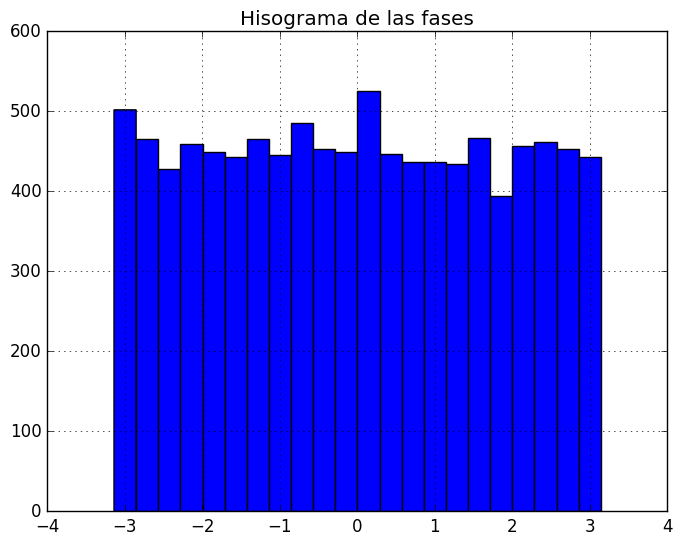

PyObject <matplotlib.text.Text object at 0x7fefdbdadfd0>

In [12]:
#Unimos todo lo anterior en una sola función.
function Histogram(n)
    Arr = Float64[]
    JJ = eigvecs(Expo(n))
    OO = map(angle, JJ)
    for i in eachindex(OO)
        push!(Arr,OO[i])
    end
    plt[:hist](Arr,22)
    grid("on")
    title("Hisograma de las fases")
    
end

#Finalmente lo probamos con n = 100
Histogram(100)